# Overview
----
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension! [(Source)](https://www.kaggle.com/competitions/spaceship-titanic)

----
## Task
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

----

## Understanding the Dataset and Variables
The dataset consists of 14 features including the target. We are given the training set -*the file named train.csv*- and the test set -*the file named test.csv*-. Notice we do not have the target variable **Transported** in the file *test.csv*.

----
## Variable Descriptions

* **PassengerId**: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* **HomePlanet**: The planet the passenger departed from, typically their planet of permanent residence.

* **CryoSleep**: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* **Cabin**: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination**: The planet the passenger will be debarking to.

* **Age**: The age of the passenger.

* **VIP**: Whether the passenger has paid for special VIP service during the voyage.

* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* **Name**: The first and last names of the passenger.

* **Transported**: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
----


# EDA

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
PassengerId_submission = np.array(test["PassengerId"])
train.drop(["PassengerId"], inplace = True, axis = 1)
test.drop(["PassengerId"], inplace = True, axis = 1)

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 401.1+ KB


We observe some missing values in both train and test set. We'll have to do some preprocessing before moving on with modelling.

In [4]:
print("Missing Values in Training Set", np.sum(train.isnull()), "Missing Values in Test Set", np.sum(test.isnull()), sep = "\n \n")

Missing Values in Training Set
 
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
 
Missing Values in Test Set
 
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
print("Duplicated Rows in Training Set: " + str(np.sum(train.duplicated())), 
      "Duplicated Rows in Test Set: " + str(np.sum(test.duplicated())), sep = "\n")

Duplicated Rows in Training Set: 0
Duplicated Rows in Test Set: 0


Now let's focus on the training set.

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train.tail()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [9]:
numerical = [cols for cols in train.describe().columns]
categorical = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
text = ["Name", "Cabin"]

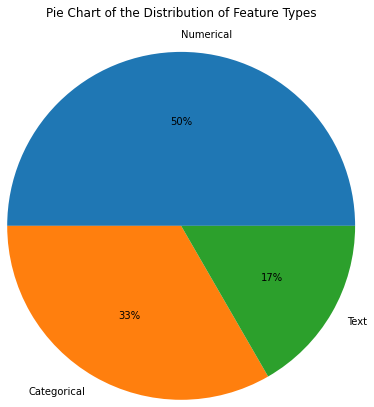

In [10]:
import matplotlib.pyplot as plt

count_feature_type = [len(x) for x in [numerical, categorical, text]]
plt.pie(count_feature_type, labels = ["Numerical", "Categorical", "Text"], autopct='%.0f%%', radius = 2);
plt.title("Pie Chart of the Distribution of Feature Types", pad = 100);

## Univariate Analysis

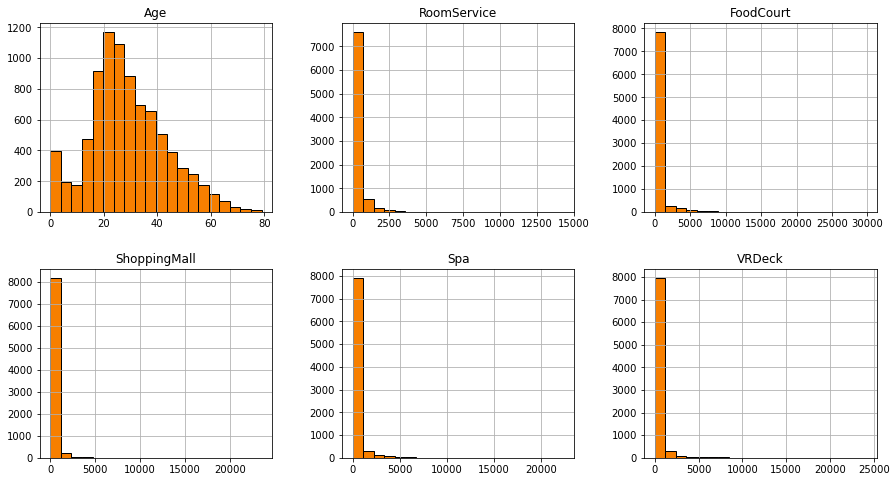

In [11]:
train.hist(figsize = (15,8), bins = 20, layout = (2,3), edgecolor = "black", color = "#f77f00");

We observe highly skewed distributions for all numerical features except **Age**.

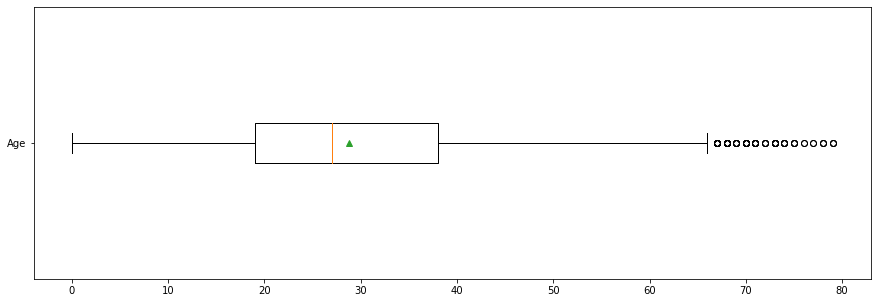

In [12]:
plt.figure(figsize =  (15,5))
plt.boxplot(train["Age"].dropna(), vert = False, labels = ["Age"], showmeans = True);

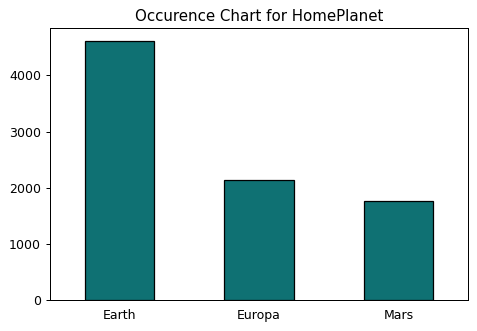

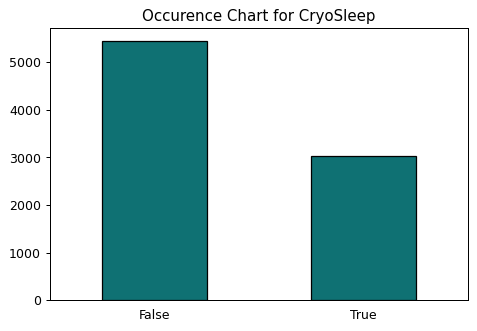

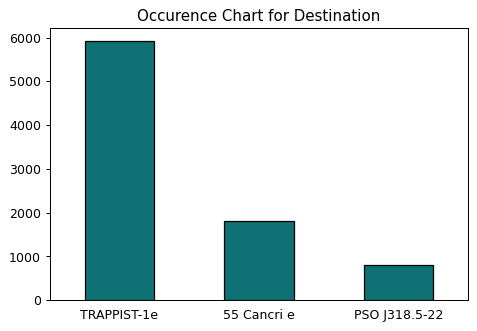

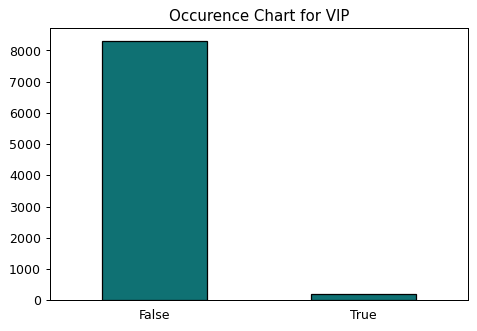

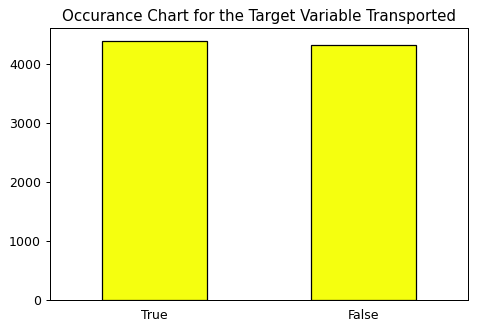

In [13]:
for elem in categorical:
    plt.figure(dpi = 90)
    train[elem].value_counts().plot.bar(color = "#0F7173", edgecolor = "black")
    plt.title("Occurence Chart for " + elem )
    plt.xticks(rotation = 0)
    plt.tick_params(axis = "x", bottom = False)

plt.figure(dpi = 90)
train.Transported.value_counts().plot.bar(color = "#f5ff0f", edgecolor = "black")
plt.title("Occurance Chart for the Target Variable Transported")
plt.xticks(rotation = 0)
plt.tick_params(axis = "x", bottom = False)

We observe **VIP** feature is highly unbalanced 

## Bivariate Analysis

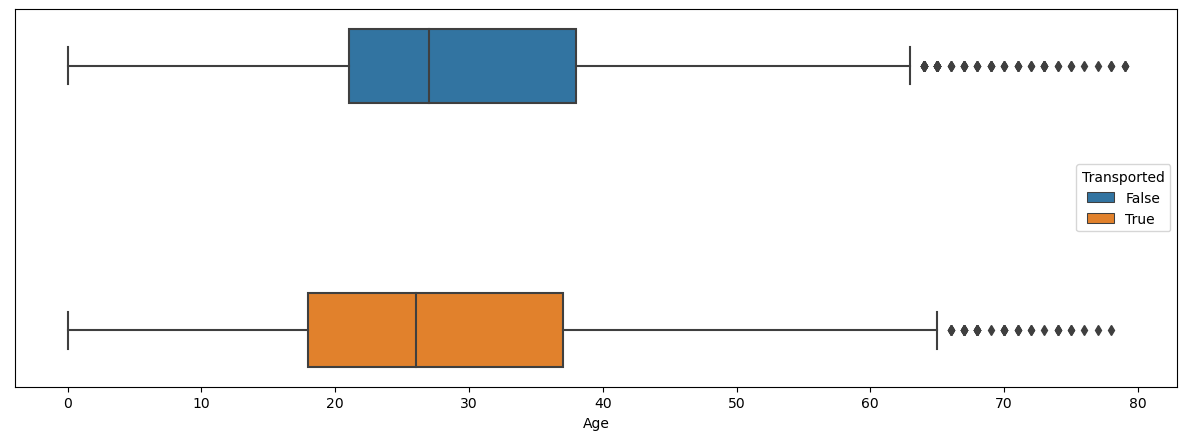

In [14]:
import seaborn as sns
plt.figure(dpi = 100, figsize = (15,5))
ax = sns.boxplot(data=train, x="Age", y="Transported", hue = "Transported", orient = "h")
plt.ylabel("")
plt.yticks(ticks = []);

It seems like the distribution of age of the people transported and not transported are very similar. Let's use KDE Plot to see this with more detail.

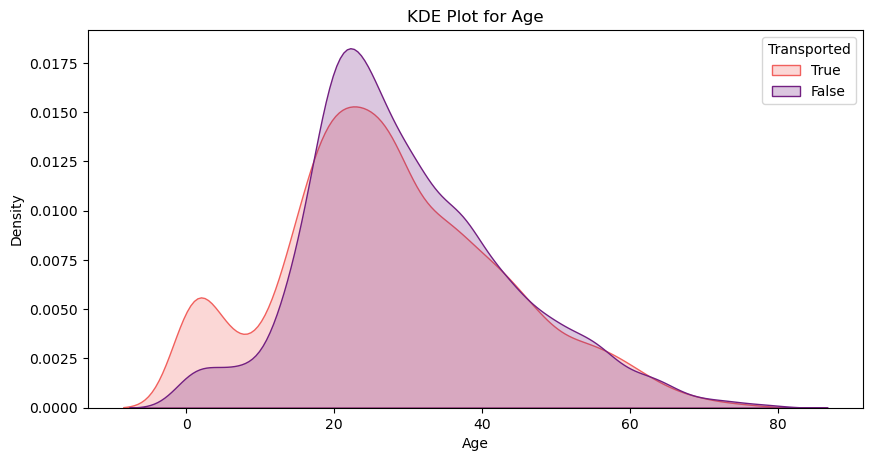

In [15]:
plt.figure(dpi = 100, figsize = (10,5))
sns.kdeplot(data = train.replace([True, False], [1,0]), x = "Age", hue = "Transported", shade = True, palette = "magma")
plt.title("KDE Plot for Age")
plt.legend(title = "Transported", labels = ["True", "False"]);

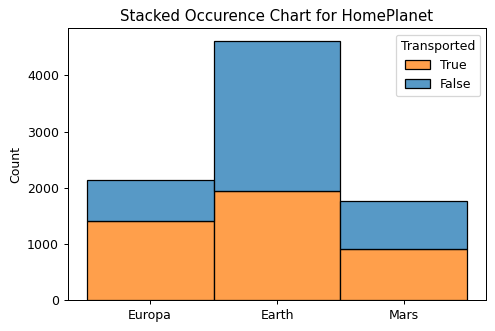

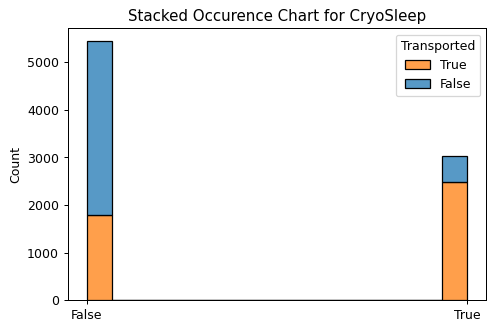

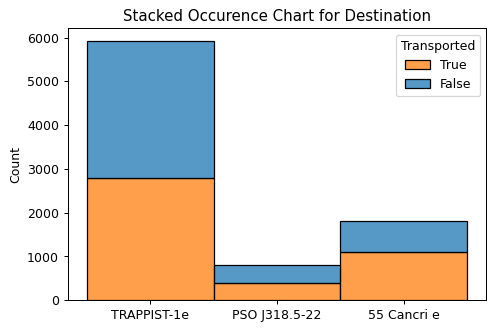

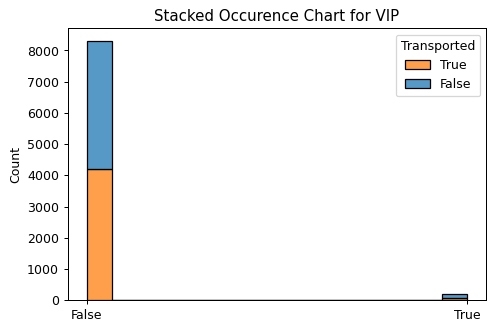

In [16]:
for elem in categorical:
    plt.figure(dpi = 90)
    sns.histplot(data = train.replace([False, True], [0, 1]), x = elem, hue = "Transported", multiple = "stack")
    plt.title("Stacked Occurence Chart for " + elem )
    plt.legend(title = "Transported", labels = ["True", "False"])
    plt.xlabel("")
    
    if elem in ["VIP", "CryoSleep"]:
        plt.xticks(ticks = [0, 1], labels = ["False", "True"])


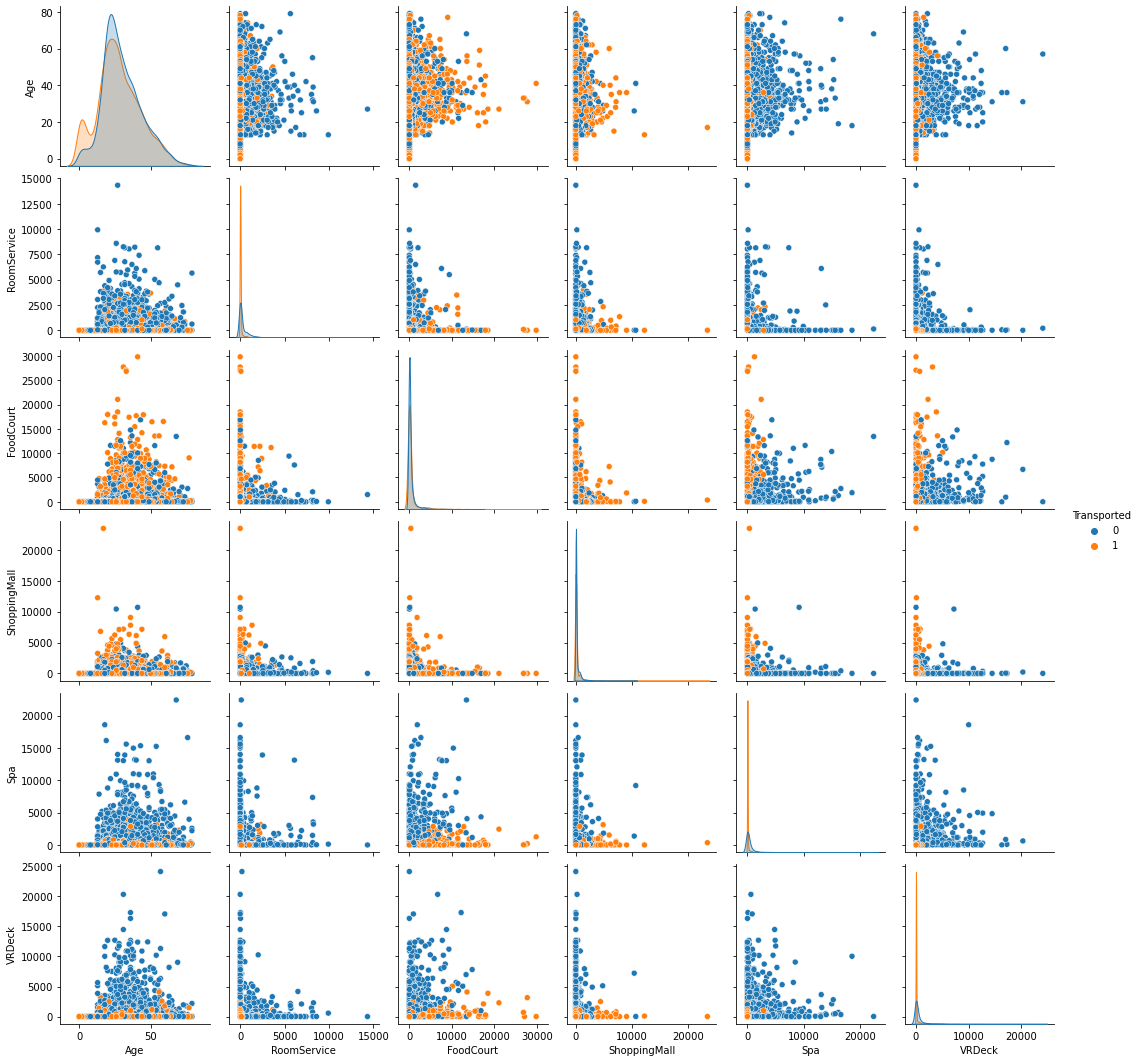

In [17]:
sns.pairplot(data = train[numerical+["Transported"]].replace([False, True], [0, 1]), hue = "Transported");

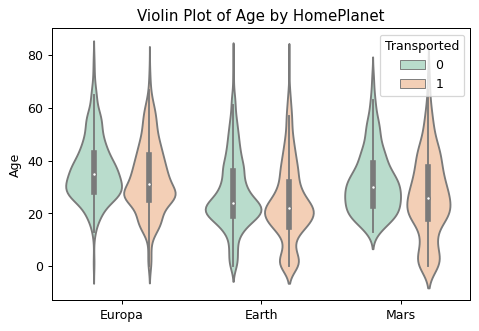

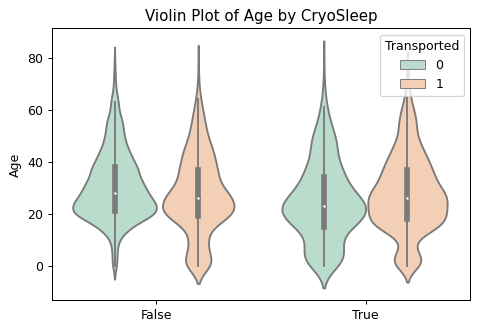

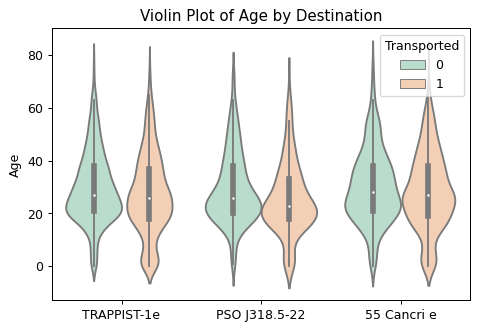

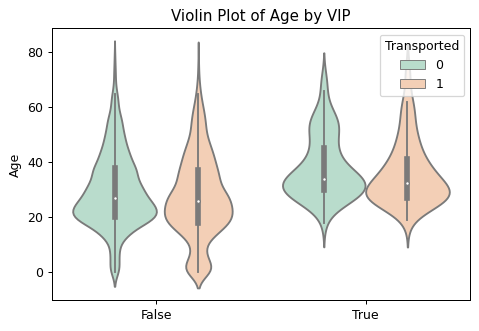

In [18]:
for elem in categorical:
    plt.figure(dpi = 90)
    sns.violinplot(data=train.replace([False, True], [0,1]), x=elem, y="Age", hue="Transported", palette = "Pastel2")
    plt.title("Violin Plot of Age by " + elem)
    plt.legend(title = "Transported", loc = "upper right")
    plt.xlabel("")
    if elem in ["VIP", "CryoSleep"]:
        plt.xticks(ticks = [0, 1], labels = ["False", "True"])
        

## EDA Conclusions
1. All of numerical features have outliers. Age is the least skewed one amongst them.
2. We do not have a balanced occurence chart for categorical features. However, VIP is the most unbalanced one.
3. The median age of transported people is slightly lower than the median age of not transported people. 
4. It happens that more than half of the people from Europa, less than half of the people from Earth, and approximately half of the people from Mars was transported.
5. While most of the people who weren't in CryoSleep wasn't transported, significant number of people were transported who were in CryoSleep. Is it possible that most of the cabins with CryoSleep pods were close to each other and teleportation area was around them?
6. We see that destination alone isn't a good predictor for our target by the stacked occurence chart.
7. More percentage of people who have purchased VIP service was not transported compared to those who have not purchased VIP service.
8. Observing the pairplot with Spa and VRDeck on the y axis and FoodCourt and ShoppingMall on the x axis, we can see the seperability.


# Data Pre-processing
----

## Handling Missing Data 

In [19]:
from sklearn.impute import SimpleImputer

imp_num = SimpleImputer(strategy = "median")
imp_cat = SimpleImputer(strategy = "most_frequent")

train[numerical] = imp_num.fit_transform(train[numerical])
test[numerical] = imp_num.transform(test[numerical])

train[categorical] = imp_cat.fit_transform(train[categorical])
test[categorical] = imp_cat.transform(test[categorical])

We have filled the missing values with medians of numerical features and with most frequent of categorical features  for both train and test sets.

## Cleaning Unimformative Features

In [20]:
train.drop(["Name", "Cabin"], inplace = True, axis = 1)
test.drop(["Name", "Cabin"], inplace = True, axis = 1)

Dropping the features **Name** and **Cabin** as I don't think they cause a person to be transported.

## Scaling Numerical Features

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[numerical] = scaler.fit_transform(train[numerical])
test[numerical] = scaler.transform(test[numerical])

## Encoding Categorical Features

In [22]:
train = pd.concat([train, pd.get_dummies(train[categorical])], axis = 1)
train.drop(categorical, inplace = True, axis = 1)

test = pd.concat([test, pd.get_dummies(test[categorical])], axis = 1)
test.drop(categorical, inplace = True, axis = 1)

## Encoding Target

In [23]:
train.replace([True, False], [1, 0], inplace = True)

## Splitting Target and Features in Train Set

In [24]:
from sklearn.model_selection import train_test_split

y = train["Transported"]
X = train.drop("Transported", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X , 
                                                    y, 
                                                    random_state = 42,
                                                    test_size =0.3)

# Gradient Boosting Classifier

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
GBC = GradientBoostingClassifier(n_estimators = 300)
scores_GBC = cross_validate(GBC, X_train, y_train, scoring = scoring)
scores_GBC

{'fit_time': array([3.31817102, 3.35364342, 3.26193786, 3.17901897, 3.13345838]),
 'score_time': array([0.03690219, 0.03686285, 0.03795576, 0.03124309, 0.03123999]),
 'test_accuracy': array([0.78471652, 0.79868529, 0.78389482, 0.7978636 , 0.80279376]),
 'test_precision': array([0.77515723, 0.78187404, 0.77480315, 0.7739521 , 0.79120879]),
 'test_recall': array([0.80555556, 0.83169935, 0.80392157, 0.84477124, 0.82487725]),
 'test_f1': array([0.7900641 , 0.80601742, 0.78909383, 0.8078125 , 0.80769231]),
 'test_roc_auc': array([0.86749176, 0.88087965, 0.86723924, 0.87586561, 0.88622099])}

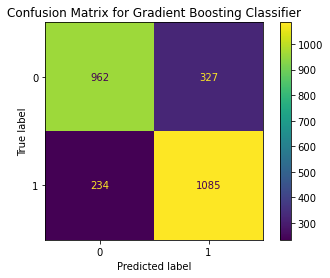

In [26]:
GBC.fit(X_train, y_train)
GBC_predict = GBC.predict(X_test)
cm_GBC = confusion_matrix(y_test, GBC_predict, labels=GBC.classes_)
disp_GBC = ConfusionMatrixDisplay(confusion_matrix=cm_GBC, display_labels=GBC.classes_)
disp_GBC.plot()
plt.title("Confusion Matrix for Gradient Boosting Classifier");

# K-Nearest Neighbors Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier(n_neighbors = 90) 
scores_KNC = cross_validate(KNC, X_train, y_train, scoring = scoring)
scores_KNC

{'fit_time': array([0.00793195, 0.00498581, 0.        , 0.        , 0.00494909]),
 'score_time': array([0.57691932, 0.60677218, 0.62166667, 0.59693241, 0.57850647]),
 'test_accuracy': array([0.77732128, 0.79293344, 0.77403451, 0.7748562 , 0.78553821]),
 'test_precision': array([0.79145299, 0.80201342, 0.791019  , 0.76572327, 0.80381944]),
 'test_recall': array([0.75653595, 0.78104575, 0.74836601, 0.79575163, 0.75777414]),
 'test_f1': array([0.77360067, 0.79139073, 0.7691016 , 0.78044872, 0.78011794]),
 'test_roc_auc': array([0.86823178, 0.87419516, 0.8553773 , 0.85778237, 0.88585233])}

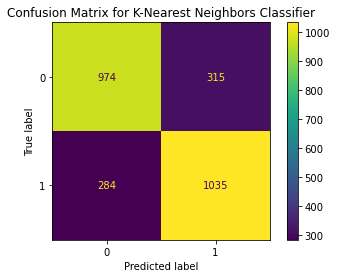

In [28]:
KNC.fit(X_train, y_train)
KNC_predict = KNC.predict(X_test)
cm_KNC = confusion_matrix(y_test, KNC_predict, labels=KNC.classes_)
disp_KNC = ConfusionMatrixDisplay(confusion_matrix=cm_KNC, display_labels=KNC.classes_)
disp_KNC.plot()
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier");

K-Nearest Neighbors Classifier and Gradient Boosting Classifier permormed similarly. However, I decided to go with Gradient Boosting Classifier as it slightly performed better on Accuracy and ROC-AUC Score on all folds.

# Submission


In [29]:
Transported_submission = GBC.predict(test)
submission = pd.DataFrame()
submission.insert(loc = 0, column = "Transported", value = Transported_submission)
submission.insert(loc = 0, column = "PassengerId", value = PassengerId_submission)
submission.replace([1, 0], [True, False], inplace = True)
submission.to_csv('submission.csv', index = False)